In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import norm
from scipy.stats import laplace
from scipy.stats import anderson_ksamp
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

In [2]:
#теоретическая задача 1

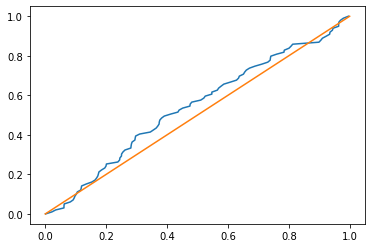

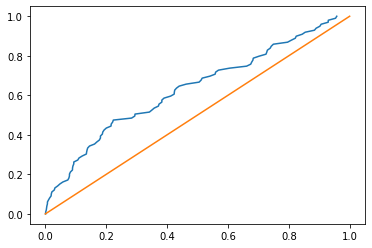

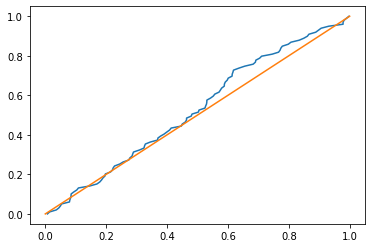

In [3]:
#i)

#a)
p = []
for i in range(100):
    x1 = norm.rvs(0, 1, 200)
    x2 = norm.rvs(0, 1, 200)
    p.append(ttest_ind(x1, x2).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

#б)
p = []
for i in range(100):
    x1 = norm.rvs(0, 1, 200)
    x2 = norm.rvs(0.1, 1, 200)
    p.append(ttest_ind(x1, x2).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

#ж)
p = []
for i in range(100):
    x1 = norm.rvs(0, 1, 200)
    x2 = laplace.rvs(0, np.sqrt(2), 200)
    p.append(ttest_ind(x1, x2).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

plt.show()

<ipython-input-4-d3bd60747cd5>:8: UserWarning: p-value capped: true value larger than 0.25
  p.append(anderson_ksamp([x1, x2]).significance_level)
<ipython-input-4-d3bd60747cd5>:18: UserWarning: p-value capped: true value larger than 0.25
  p.append(anderson_ksamp([x1, x2]).significance_level)
<ipython-input-4-d3bd60747cd5>:18: UserWarning: p-value floored: true value smaller than 0.001
  p.append(anderson_ksamp([x1, x2]).significance_level)
<ipython-input-4-d3bd60747cd5>:28: UserWarning: p-value floored: true value smaller than 0.001
  p.append(anderson_ksamp([x1, x2]).significance_level)


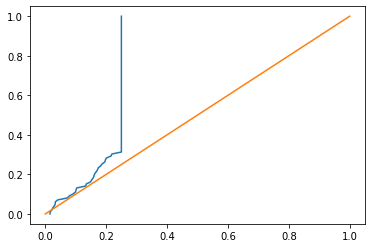

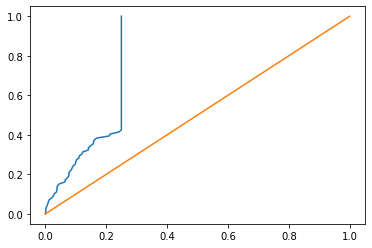

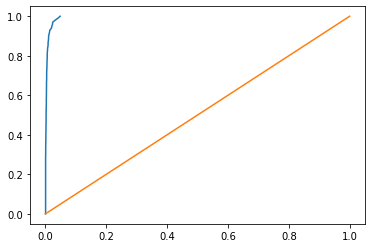

In [4]:
#v)

#a)
p = []
for i in range(100):
    x1 = norm.rvs(0, 1, 200)
    x2 = norm.rvs(0, 1, 200)
    p.append(anderson_ksamp([x1, x2]).significance_level)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

#б)
p = []
for i in range(100):
    x1 = norm.rvs(0, 1, 200)
    x2 = norm.rvs(0.1, 1, 200)
    p.append(anderson_ksamp([x1, x2]).significance_level)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

#ж)
p = []
for i in range(100):
    x1 = norm.rvs(0, 1, 200)
    x2 = laplace.rvs(0, np.sqrt(2), 200)
    p.append(anderson_ksamp([x1, x2]).significance_level)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.24it/s]


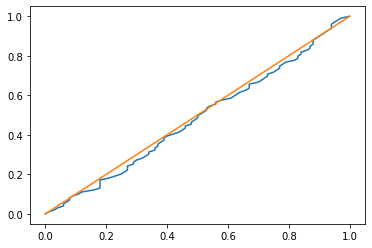

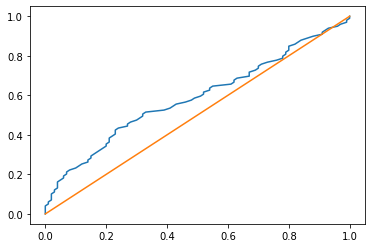

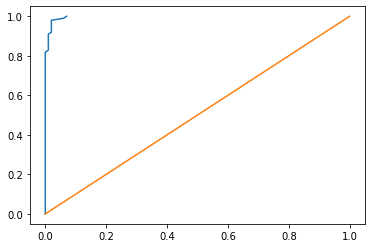

In [5]:
#ii)

def bws_stat(x1, x2):
    array = np.concatenate([x1,x2])
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    S = sorted(ranks[:len(x1)])
    R = sorted(ranks[len(x1):])
    Bx = 0
    By = 0
    for i in range(1, len(x1)+1):
        Bx = Bx + ((S[i-1]-(len(x1)+len(x2))*i*1.0/len(x1))**2)/(i*1.0/(len(x1)+1)*(1-i*1.0/(len(x1)+1))*len(x2)*(len(x1)+len(x2))*1.0/len(x1))                
    for i in range(1, len(x2)+1):
        By = By + ((R[i-1]-(len(x2)+len(x1))*i*1.0/len(x2))**2)/(i*1.0/(len(x2)+1)*(1-i*1.0/(len(x2)+1))*len(x1)*(len(x2)+len(x1))*1.0/len(x2))                
    return (Bx + By) / 2         


def permutation_test(x1, x2, stat):
    T = stat(x1,x2)
    T_i = []
    for i in range(100):
        array = np.concatenate([x1,x2])
        np.random.shuffle(array)
        x1 = array[:len(x1)]
        x2 = array[len(x1):]
        T_i.append(stat(x1,x2))
    #print(T<T_i)
    return np.sum(T<T_i)/len(T_i)


#a)
p = []
for i in tqdm(range(100)):
    x1 = norm.rvs(0, 1, 200)
    x2 = norm.rvs(0, 1, 200)
    p.append(permutation_test(x1, x2, bws_stat))
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

#б)
p = []
for i in tqdm(range(100)):
    x1 = norm.rvs(0, 1, 200)
    x2 = norm.rvs(0.1, 1, 200)
    p.append(permutation_test(x1, x2, bws_stat))
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

#ж)
p = []
for i in tqdm(range(100)):
    x1 = norm.rvs(0, 1, 200)
    x2 = laplace.rvs(0, np.sqrt(2), 200)
    p.append(permutation_test(x1, x2, bws_stat))
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

plt.show()

In [ ]:
#теоретическая задача 2

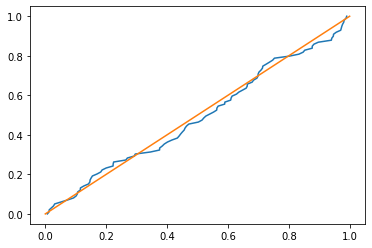

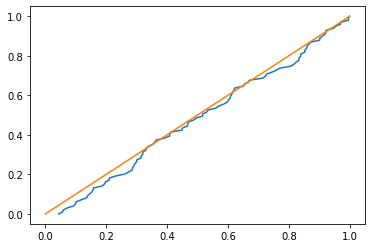

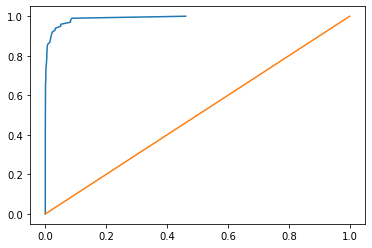

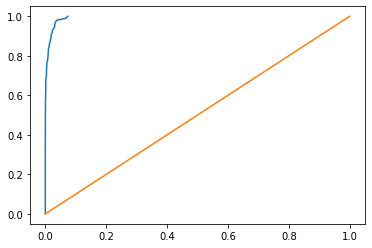

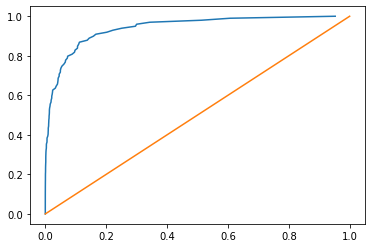

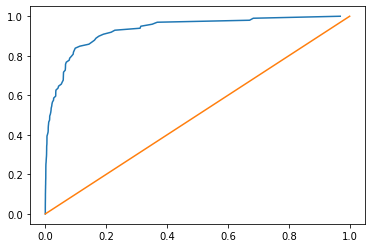

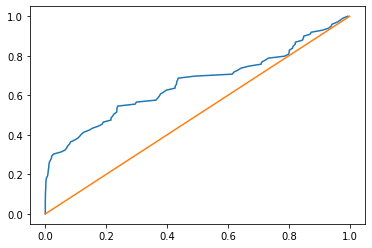

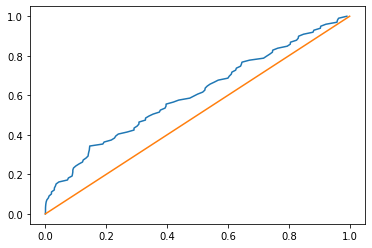

In [19]:
#a)
#i)
a = []
for i in range(5):
    a.append(1)
    
p = []
for i in range(100):
    X = []
    for i in range(5):
        X.append(norm.rvs(a[i], 1, 100))
    p.append(f_oneway(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

p = []
for i in range(100):
    X = []
    for i in range(5):
        X.append(norm.rvs(a[i], 1, 100))
    p.append(kruskal(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])


#ii)
a = []
for i in range(5):
    a.append(0)
a[4] = 0.5
    
p = []
for i in range(100):
    X = []
    for i in range(5):
        X.append(norm.rvs(a[i], 1, 100))
    p.append(f_oneway(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

p = []
for i in range(100):
    X = []
    for i in range(5):
        X.append(norm.rvs(a[i], 1, 100))
    p.append(kruskal(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])


#iii)
a = []
for i in range(5):
    a.append((i+1)/10)
    
p = []
for i in range(100):
    X = []
    for i in range(5):
        X.append(norm.rvs(a[i], 1, 100))
    p.append(f_oneway(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

p = []
for i in range(100):
    X = []
    for i in range(5):
        X.append(norm.rvs(a[i], 1, 100))
    p.append(kruskal(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])


#iv)
a = []
for i in range(5):
    a.append(0)
a[4] = 0.5
    
p = []
for i in range(100):
    X = []
    for i in range(4):
        X.append(norm.rvs(a[i], 1, 100))
    X.append(norm.rvs(a[4], 4, 100))
    p.append(f_oneway(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

p = []
for i in range(100):
    X = []
    for i in range(4):
        X.append(norm.rvs(a[i], 1, 100))
    X.append(norm.rvs(a[4], 4, 100))
    p.append(kruskal(*X).pvalue)
plt.figure()
plt.plot(sorted(p), np.linspace(0, 1, 100))
plt.plot([0,1],[0,1])

plt.show()

In [ ]:
#практическая задача 1

In [115]:
In = ''' 5    88    22.4    8.4    B    L    R   
10    87    23.4    8.8    B    L    L   
12    87    22.5    9.7    B    R    R   
 1    88    23.2    9.8    B    L    R   
 2    88    23.1    8.9    B    L    R   
 3    88    23.7    9.7    B    R    R   
 2    88    24.1    9.6    B    L    R   
 6    88    21.0    8.8    G    L    R   
 5    88    21.6    9.3    G    R    R   
 9    88    20.9    8.8    B    R    L   
 9    87    25.5    9.8    B    R    R   
 3    88    22.8    8.9    B    L    R   
 8    87    24.1    9.1    B    L    R   
 3    88    25.0    9.8    B    L    R   
11    87    24.0    9.3    G    L    R   
 4    88    21.7    7.9    G    R    R   
12    87    22.0    8.7    G    R    L   
 3    88    22.7    8.8    G    R    R   
 6    88    24.7    9.0    G    L    L   
 3    88    23.5    9.5    G    R    R   
 6    88    22.0    9.2    B    R    R   
 7    88    22.4    8.6    B    L    R   
 9    88    22.0    8.3    G    R    L   
 9    88    22.5    9.0    G    L    R   
10    88    22.2    8.1    G    L    R   
 7    88    25.1    9.4    B    L    R   
 2    88    24.1    9.5    G    L    R   
12    87    23.5    9.5    B    R    R   
11    88    22.2    8.9    B    L    R   
 8    88    21.9    9.3    B    R    L   
 6    88    22.0    9.3    G    L    R   
 7    88    20.5    8.6    G    R    R   
 3    88    22.5    8.6    G    L    R   
 4    88    21.6    9.0    B    R    L   
 4    88    22.7    8.6    B    R    L   
 3    88    20.9    8.5    G    L    R   
 3    88    24.0    9.0    G    L    R   
 1    88    19.6    7.9    G    R    R   
 9    88    22.6    8.8    G    L    R '''
x = []
st = []
for e in In.split():
    st.append(e)
    if (len(st)>=0 and len(st)<=3):
        e = float(e)
    if len(st) == 7:
        x.append(st)
        st = []
x = pd.DataFrame(x)
x[0] = x[0].astype(float)
x[1] = x[1].astype(float)
x[2] = x[2].astype(float)
x[3] = x[3].astype(float)
x.head()

,0,1,2,3,4,5,6
0,5.0,88.0,22.4,8.4,B,L,R
1,10.0,87.0,23.4,8.8,B,L,L
2,12.0,87.0,22.5,9.7,B,R,R
3,1.0,88.0,23.2,9.8,B,L,R
4,2.0,88.0,23.1,8.9,B,L,R


In [117]:
#a)
b = np.asarray(x[x[4] == 'B'][2])
g = np.asarray(x[x[4] == 'G'][2])
print(anderson_ksamp([b, g]).significance_level, ttest_ind(b, g).pvalue)

#b)
b = np.asarray(x[x[4] == 'B'][3])
g = np.asarray(x[x[4] == 'G'][3])
print(anderson_ksamp([b, g]).significance_level,ttest_ind(b, g).pvalue)

#c)
l = np.asarray(x[x[6] == 'L'][3])
r = np.asarray(x[x[6] == 'R'][3])
print(ttest_ind(l, r).pvalue, anderson_ksamp([l, r]).significance_level)
print(mannwhitneyu(l, r))
#d)
x[7] = 24 - ((x[1]-87)*12 + x[0])
little = np.asarray(x[x[7]<9][2]*x[x[7]<9][3])
big = np.asarray(x[x[7]>=9][2]*x[x[7]>=9][3])
print(ttest_ind(little, big).pvalue, anderson_ksamp([little, big]).significance_level)
little = np.asarray(x[x[7]<9][3])
big = np.asarray(x[x[7]>=9][3])
print(ttest_ind(little, big).pvalue, anderson_ksamp([little, big]).significance_level)
little = np.asarray(x[x[7]<9][2])
big = np.asarray(x[x[7]>=9][2])
print(ttest_ind(little, big).pvalue, anderson_ksamp([little, big]).significance_level)

0.10546442122993777 0.062339779130769025
0.014297796721853249 0.01091739581500831
0.26856407934809895 0.18516049427526018
MannwhitneyuResult(statistic=86.0, pvalue=0.0953500872526501)
0.00741169586657122 0.0028290142976626015
0.023360869257240183 0.01561742933191423
0.015771085866306257 0.0012553406546631975


In [90]:
#практическая задача 2

In [98]:
In = '''136	60	
62	27	
85	37	
219	*	
71	48	
9	*	
9	164	
23	108	
52	101	
77	59	
101	*	
4	41	
10	67	
61	5	
11	19	
5	4	
12	19	
58	*	
0	15	
61	2	
26	76	
59	164	
94	35	
13	60	
56	35	
11	100	
2	16	
42	43	
15	26	
19	3	
7	34	
13	42	
20	46	
1	7	
82	*	
50	*	
13	3	
124	9	
111	*	
28	28	
27	*	
19	4	
70	8	
64	142	
27	*	
53	*	
170	*	
7	27	
62	38	
70	14	
1	12	
0	0	
69	5	
32	*	
59	58	
9	19	
49	113	
90	13	
9	52	
55	*	
37	5	
2	30	
8	*	'''
x = []
st = []
for e in In.split():
    st.append(e)
    if len(st) == 2:
        x.append(st)
        st = []
x = pd.DataFrame(x)
x = x[x[1]!='*']
x[0] = x[0].astype(int)
x[1] = x[1].astype(int)
ttest_rel(np.asarray(x[0]), np.asarray(x[1]))
#ttest_ind(x[0], x[1])

Ttest_relResult(statistic=-0.5587958527236361, pvalue=0.578898816235907)

In [ ]:
#практическая задача 3

In [107]:
In = '''3    2     23      1
  2    2     77      2
  3    2     20      3
  3    1     12      4
  3    1     19      5
  2    1     54      6
  3    2     15      7
  2    2     44      8
  2    2     41      9
  2    1     15     10
  1    2     73     11
  3    1     31     12
  1    1     41     13
  2    1     31     14
  1    1     79     15
  1    2     70     16
  1    1     80     17
  1    2     69     18'''
x = []
st = []
for e in In.split():
    st.append(e)
    if len(st) == 4:
        x.append(st[:3])
        st = []
x = pd.DataFrame(x)
x[0] = x[0].astype(int)
x[1] = x[1].astype(int)
x[2] = x[2].astype(int)
print(anderson_ksamp([x[x[0]==1][2],x[x[0]==2][2],x[x[0]==3][2]]).significance_level)
print(anderson_ksamp([x[x[1]==1][2],x[x[1]==2][2]]).significance_level)

0.0023529625168876808
0.25


<ipython-input-107-530e31999d23>:31: UserWarning: p-value capped: true value larger than 0.25
  print(anderson_ksamp([x[x[1]==1][2],x[x[1]==2][2]]).significance_level)
